In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans, AgglomerativeClustering


In [28]:
data_atm = pd.read_csv("C:\\Users\\cnctk\\fl_internship\\datasets\\Australian Travel Motives\\vacmot_segmentation_variables.csv")

In [29]:
data_atm

,rest and relax,luxury / be spoilt,do sports,excitement,a challenge,not exceed planned budget,realise creativity,fun and entertainment,good company,health and beauty,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,NaN
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,NaN
3,1,1,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,NaN
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,1,0,1,1,0,0,...,0,1,1,0,1,0,0,1,1,NaN
996,1,0,0,0,1,0,1,0,1,1,...,0,1,1,0,1,0,1,1,0,NaN
997,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,NaN
998,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [30]:
data_atm = data_atm.drop("change of surroundings",axis=1)


In [31]:
# doing segmentation using k-means
k_partitioning = 6  # Choose a large number of clusters
kmeans = KMeans(n_clusters=k_partitioning, random_state=1234, n_init=10)
kmeans.fit(data_atm)
cluster_centers = kmeans.cluster_centers_

In [34]:
clusters = kmeans.predict(data_atm)


In [58]:
values, counts = np.unique(clusters, return_counts=True)

####  clusters count

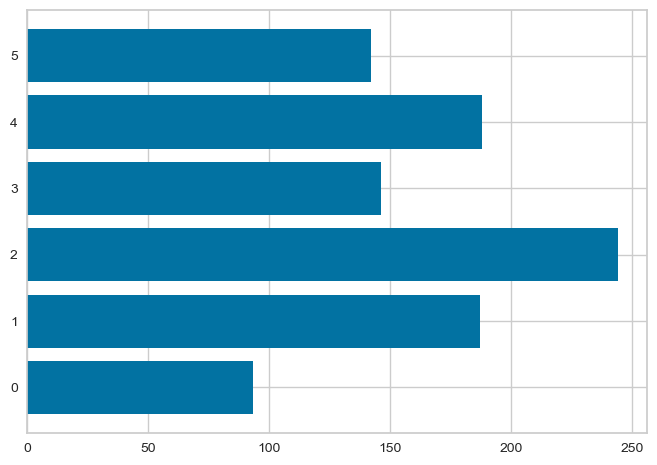

In [60]:
plt.barh(values, counts)
plt.show()

#### Dendograms

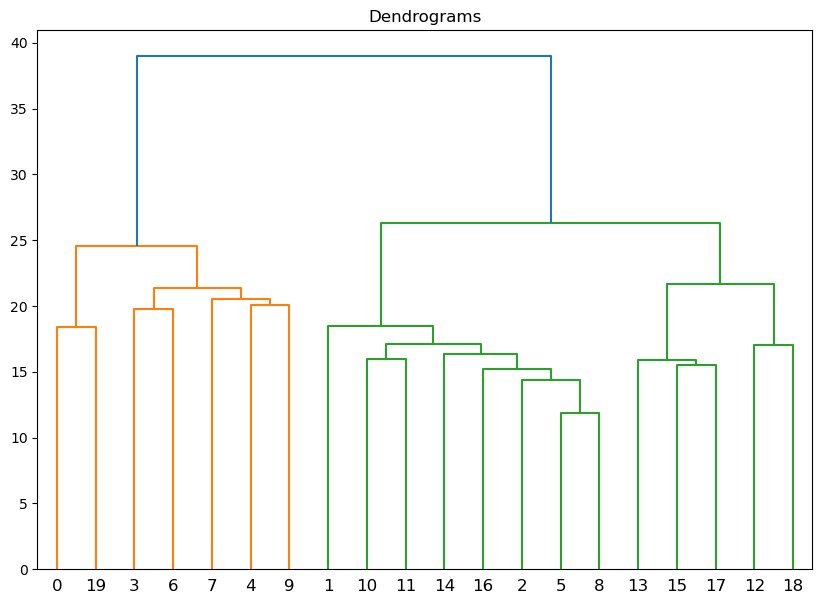

In [51]:
## using hierarichal clustering

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_atm.transpose(), method='ward'))

#### pca

In [52]:
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(data_atm)


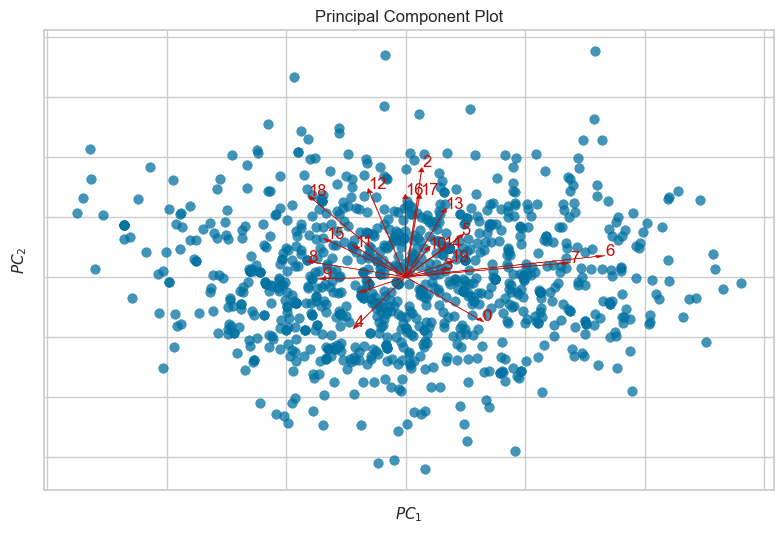

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [53]:
from yellowbrick.features.pca import PCADecomposition
visualizer = PCADecomposition(scale=True, proj_features = True, color = 'PRGn')
visualizer.fit_transform(principalComponents)
visualizer.show()